In [14]:
import pandas as pd
import seaborn as sns

In [15]:
X_TRAIN_PATH = "data/interim/X_train.pkl"

In [16]:
from src.utils import deserialize_data

X_train = deserialize_data(X_TRAIN_PATH)

In [17]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32377,64,46000,RENT,2.0,PERSONAL,C,4800,11.09,0.10,Y,24
1338,26,26000,OWN,0.0,DEBTCONSOLIDATION,E,8500,16.45,0.33,N,3
7047,23,51000,MORTGAGE,3.0,PERSONAL,C,16000,13.11,0.31,Y,3
8225,22,56004,MORTGAGE,6.0,MEDICAL,A,6000,7.88,0.11,N,4
7178,24,79000,RENT,3.0,PERSONAL,C,7000,12.54,0.09,N,3


In [18]:
Y_TRAIN_PATH = "data/interim/y_train.pkl"

In [19]:
y_train = deserialize_data(Y_TRAIN_PATH)

In [20]:
y_train.head()

32377    0
1338     1
7047     0
8225     0
7178     0
Name: loan_status, dtype: int64

In [21]:
num_col = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
cat_col = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 32377 to 23654
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25347 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23585 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


In [23]:
"""
Untuk kedepan akan dipisah antara feature numeric dan feature categorical
"""

'\nUntuk kedepan akan dipisah antara feature numeric dan feature categorical\n'

In [44]:
X_train.duplicated(keep=False)

32377    False
1338     False
7047     False
8225     False
7178     False
         ...  
29802    False
5390     False
860      False
15795    False
23654    False
Length: 26064, dtype: bool

In [25]:
"""
Ditemukan adanya duplikasi pada data
"""

'\nTidak ditemukan adanya duplikasi data, maka tidak akan ada tindakan penghapusan data duplikat\n'

In [45]:
X_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              717
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2479
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [27]:
"""
Terdapat data null pada feature person_emp_length, dan loan_int_rate. Maka akan dilakukan proses imputasi atau deletion pada rows
"""

'\nTerdapat data null pada feature person_emp_length, dan loan_int_rate. Maka akan dilakukan proses imputasi atau deletion pada rows\n'

In [28]:
X_train_ = X_train[num_col]

In [29]:
X_train_.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
32377,64,46000,2.0,4800,11.09,0.10,24
1338,26,26000,0.0,8500,16.45,0.33,3
7047,23,51000,3.0,16000,13.11,0.31,3
8225,22,56004,6.0,6000,7.88,0.11,4
7178,24,79000,3.0,7000,12.54,0.09,3


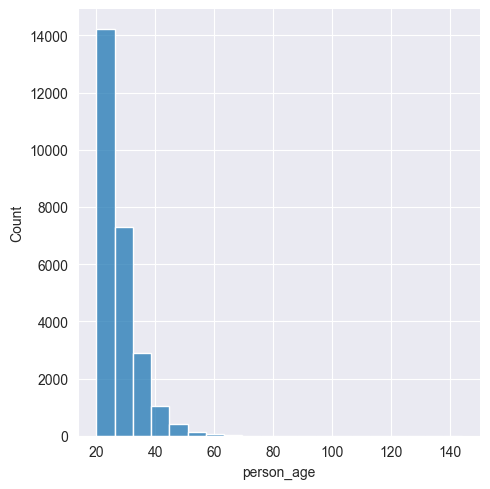

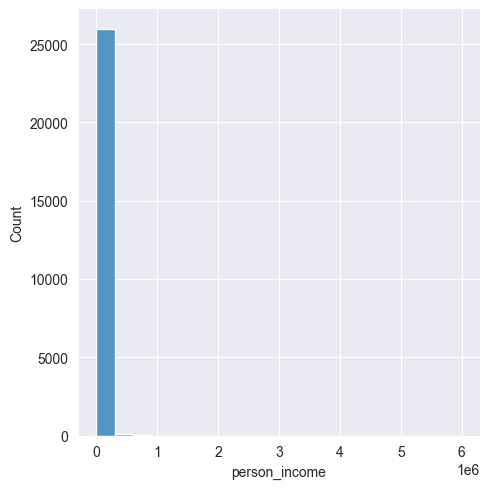

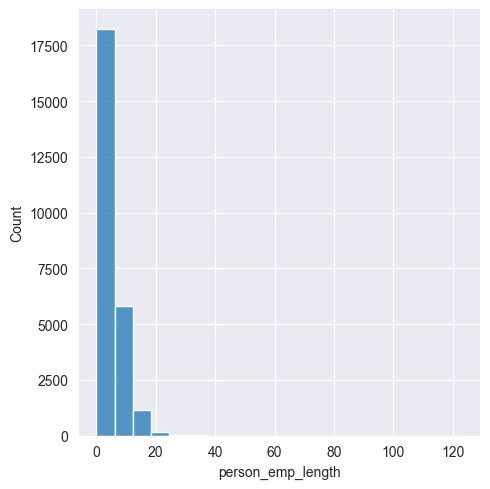

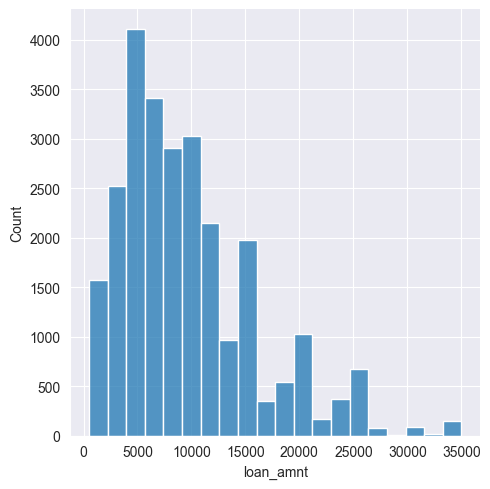

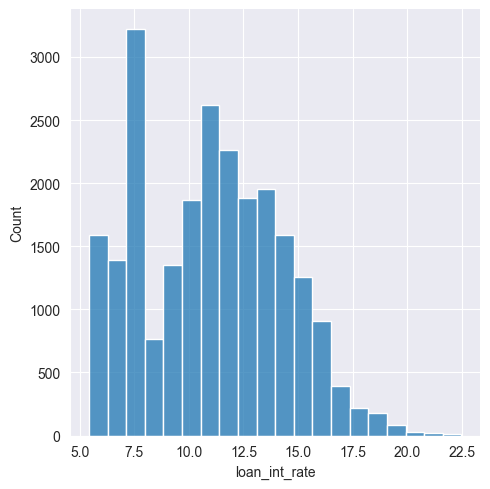

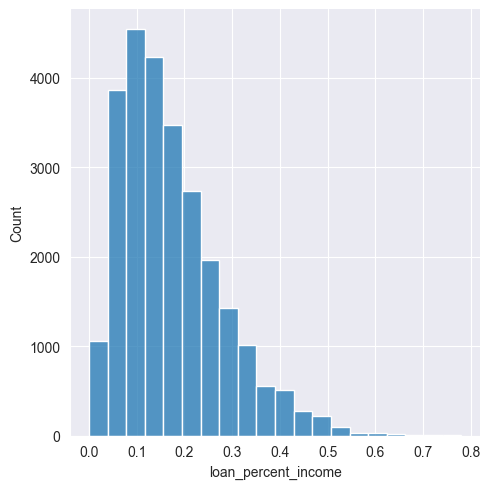

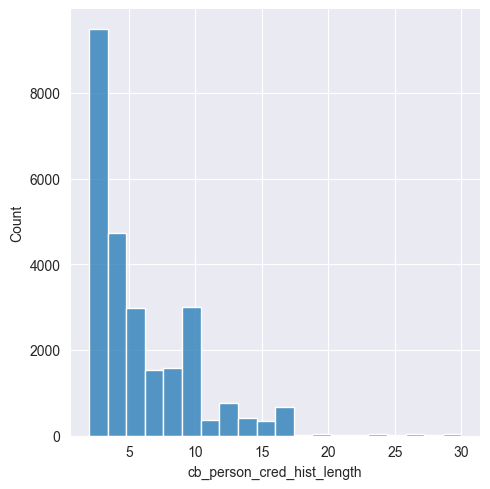

In [30]:
%matplotlib inline

col = []
for col in num_col:
    sns.displot(X_train_[col], bins=20)

In [47]:
"""
Plot diatas menunjukkan distribusi yang skewed ke kanan. Maka, untuk strategi imputasi yang bisa dilakukan
ialah dengan imputasi data median pada nilai null
"""

2

<Axes: xlabel='loan_status', ylabel='count'>

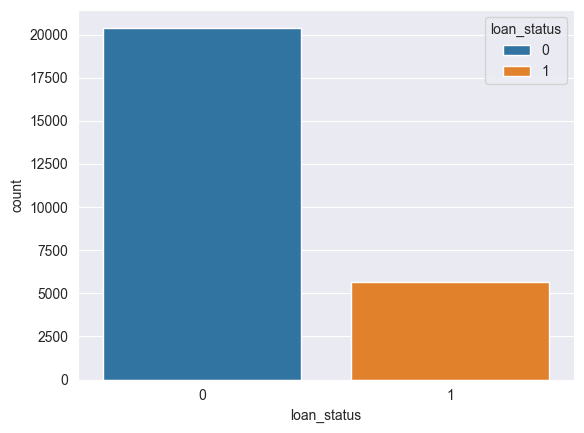

In [46]:
sns.countplot(data=y_train.to_frame(), x="loan_status", hue="loan_status")


In [ ]:
"""
Terdapat class imbalance pada data y_train. Untuk mengatasi hal ini maka dapat dilakukan oversampling pada data
"""

In [ ]:
"""
Terdapat data null pada feature person_emp_length, dan loan_int_rate. Maka akan 
dilakukan proses imputasi atau deletion pada rows. Untuk strategi imputasi sendiri akan dipilih median,
karena plot diatas menunjukkan bahwa data cenderung skewed dan bukan distribusi normal
"""